In [100]:
import sys
local_path = !pwd
project_path = '/'.join(local_path[0].split('/')[:-1])
sys.path.append(project_path + '/src')
images_path = project_path + '/data/101_ObjectCategories/'

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import helpers
import numpy as np
import pywt
from dwt_search import *
from scipy.misc import imread, imresize 

In [101]:
images_path = project_path + '/data/101_ObjectCategories/'
example_image_categories = ['butterfly/', 'platypus/', 'dolphin/', 'elephant/', 'Faces/']
noise_image_categories = ['crocodile/']

idxs = [range(1, 9)]
image_categories = example_image_categories + noise_image_categories
example_images = [imread(images_path + c + '/image_000{}.jpg'.format(i)) for i in range(1,9) for c in image_categories]

nautilus_idxs = [15, 21, 23, 24, 25]
nautilus_img = imread(images_path + 'nautilus/image_000{}.jpg'.format(9))
face_img = imread(images_path + 'Faces/image_000{}.jpg'.format(9))
odd_imgs = [face_img, nautilus_img]+ [imread(images_path + 'nautilus/image_00{}.jpg'.format(i)) for i in nautilus_idxs]

example_images = example_images + nautilus_imgs

drawn_images = [imread(project_path + '/data/{}.jpg'.format(i)) for i in range(8)]

In [102]:
coeff_transformer = WaveletCoefficientTransformer(3, 'haar', 'symmetric', 1)
thresholder = ThresholdTransformer(1000, binary=True)
weights = np.dstack([np.ones((128, 128)) for __ in range(3)])
iqm = ImageQueryingMetric(coeff_transformer, thresholder, (256, 256), weights)

iqm.fit(example_images)

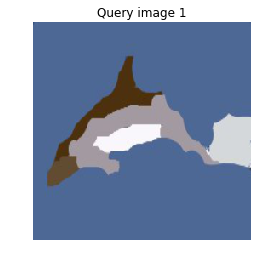

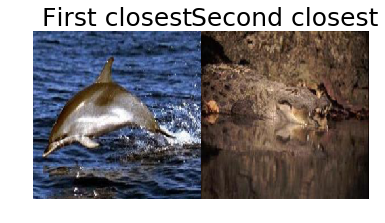

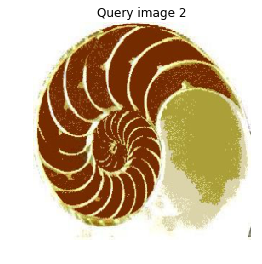

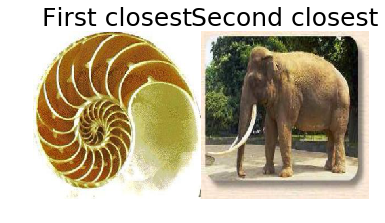

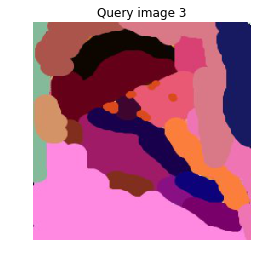

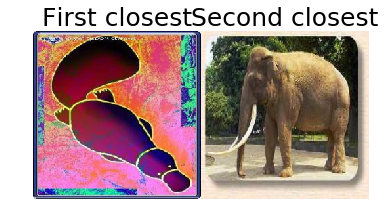

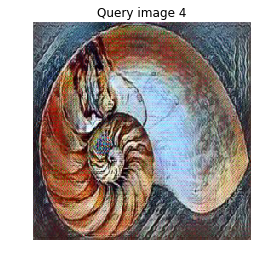

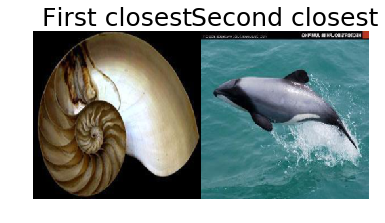

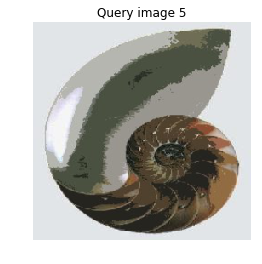

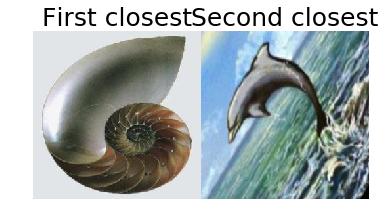

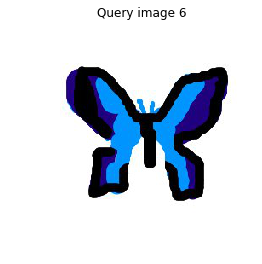

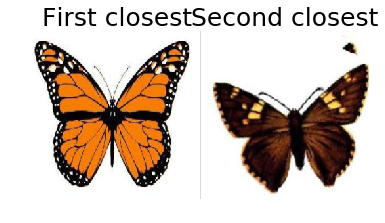

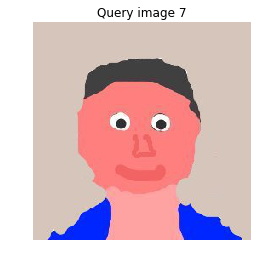

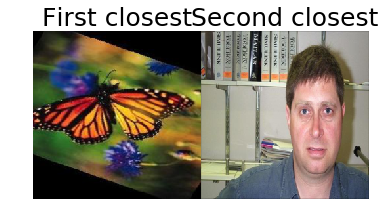

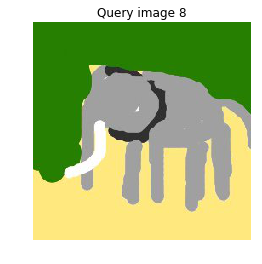

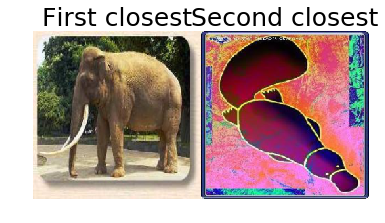

In [103]:
for i, img in enumerate(drawn_images):
  plt.imshow(imresize(img, (256, 256)))
  plt.title('Query image {}'.format(i+1))
  plt.axis('off')
  plt.show()
  img_indices, __ = iqm.predict_single(img, 2)
  imgs = [imresize(example_images[i], (256, 256)) for i in img_indices]

  helpers.plot_linear_layout(imgs, ['First closest', 'Second closest'])